In [1]:
import DS_functions as df

In [2]:
df.steam.head()

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49


# RQ3 test

*Now it's important to understand the preferred time to do reviews.*
   - What is the most common time that authors review an application? For example, authors usually write a review at 17:44.


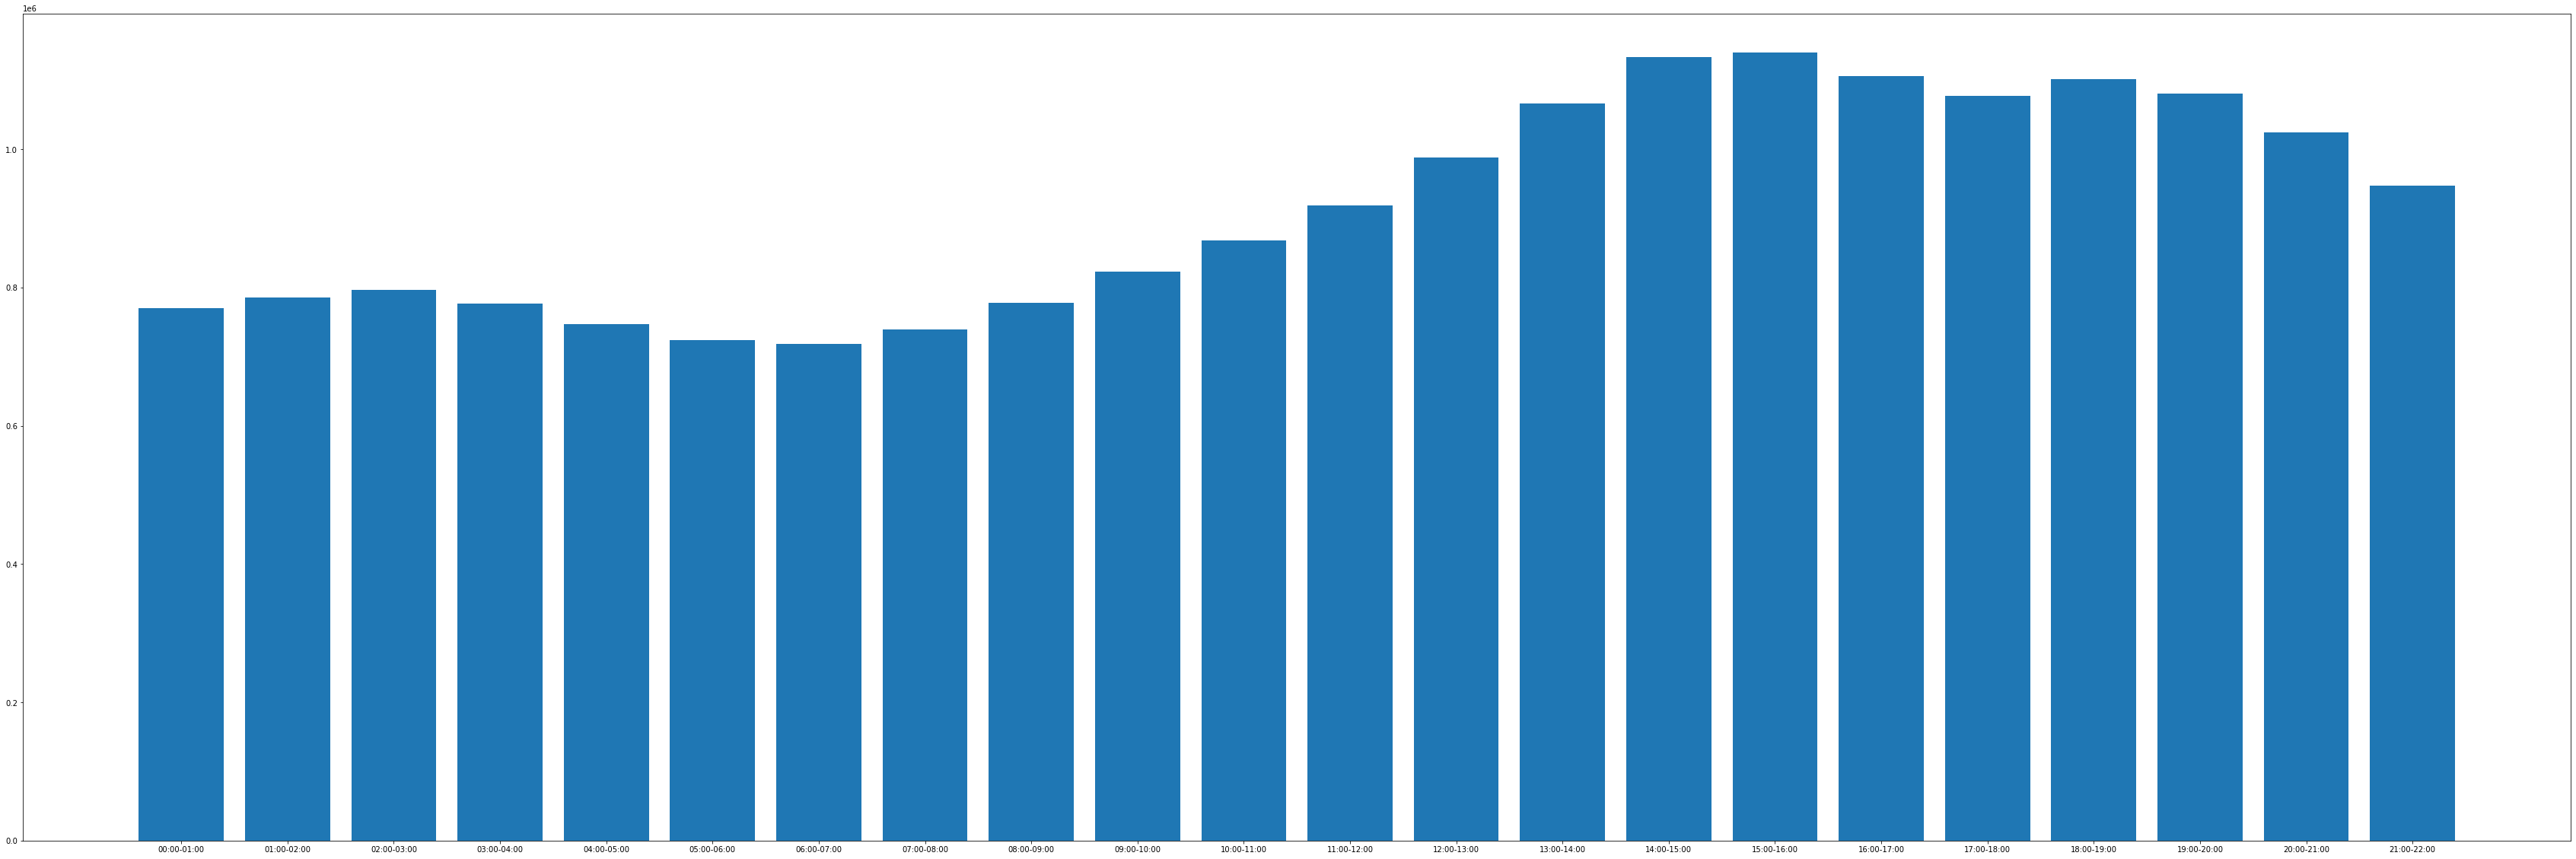

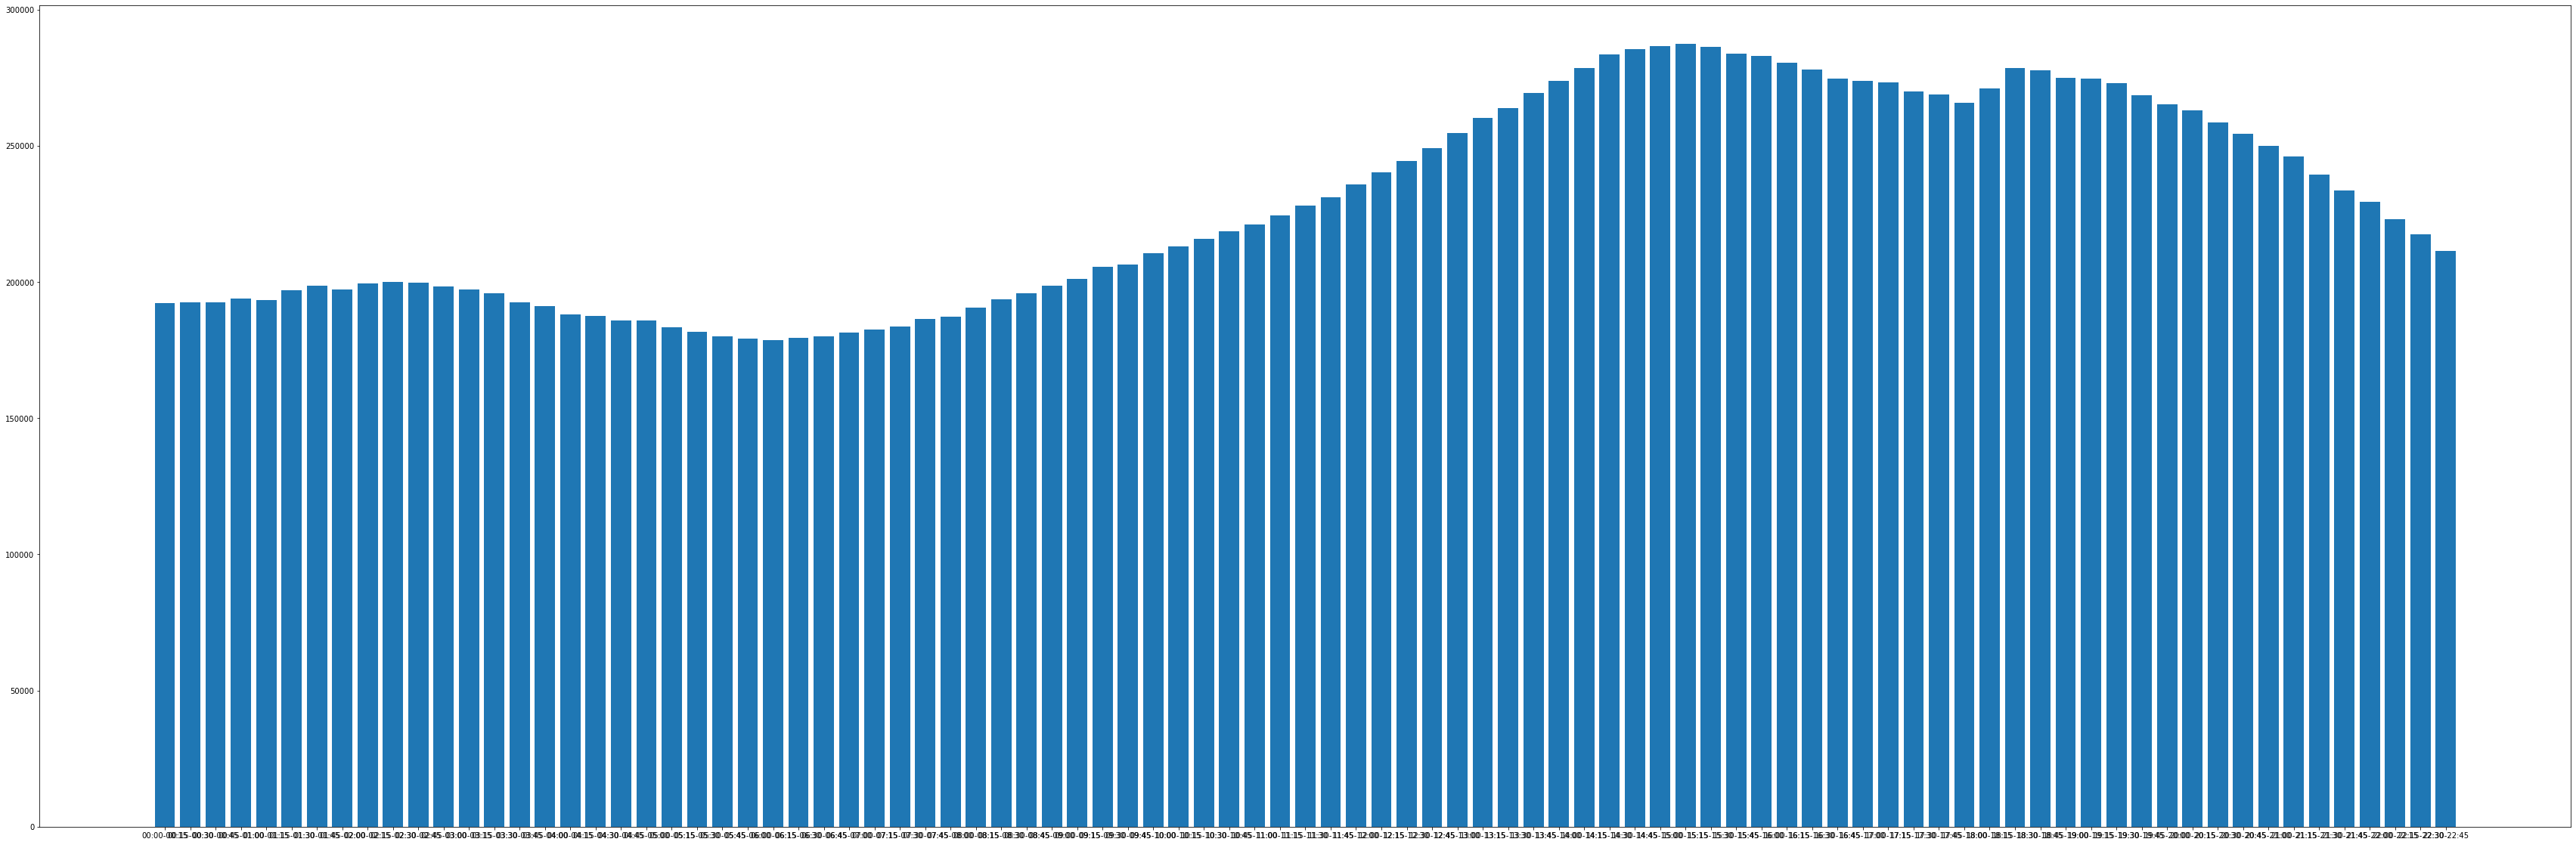

In [3]:
df.plt.figure(1, figsize=(60,20))
df.numbersOfReviewForTime(df.datetime_range(0,23,60));
df.plt.figure(2, figsize=(60,20))
df.numbersOfReviewForTime(df.datetime_range(0,23,15));

   - Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.


In [ ]:
df.numbersOfReviewForTime([["8:00", "10:00"],["13:00", "18:00"]])

    - Use the function that you created in the previous literal to plot the number of reviews between the following time intervals: 
    
| Initial time | Final time |
| ----------- | ----------- |
|06:00:00 | 10:59:59|
|11:00:00 | 13:59:59|
|14:00:00 | 16:59:59|
|17:00:00 | 19:59:59|
|20:00:00 | 23:59:59|
|00:00:00 | 02:59:59|
|03:00:00 | 05:59:59|

In [ ]:
df.plt.figure(figsize=(15,15))
df.numbersOfReviewForTime([["06:00:00", "10:59:59"],["11:00:00", "13:59:59"], ["14:00:00",  "16:59:59"], ["17:00:00", "19:59:59"], ["20:00:00", "23:59:59"], ["00:00:00", "02:59:59"],["03:00:00", "05:59:59"]]);

# RQ6 test
   - What is the average time (days and minutes) a user lets pass before he updates a review?


In [7]:
t = df.steam[["timestamp_created", "timestamp_updated"]].swifter.apply(lambda row:row["timestamp_updated"] - row["timestamp_created"], axis=1)

In [8]:
t.describe()

count                       21747371
mean      36 days 03:33:10.465412482
std      179 days 01:56:57.614794106
min                -1 days +23:59:56
25%                  0 days 00:00:00
50%                  0 days 00:00:00
75%                  0 days 00:00:00
max               8069 days 20:08:16
dtype: object

### NOTA

  - C'è un solo valore negativo: created < update ????

In [9]:
t.sort_values()

19179653    -1 days +23:59:56
0             0 days 00:00:00
13184605      0 days 00:00:00
13184604      0 days 00:00:00
13184603      0 days 00:00:00
                  ...        
1561447    3710 days 12:51:16
3538178    7790 days 08:35:39
9287504    7794 days 00:01:21
10694933   7959 days 20:10:23
14636766   8069 days 20:08:16
Length: 21747371, dtype: timedelta64[ns]

   - Plot the top 3 authors that usually update their reviews.
   
Top 3 utenti con più recensioni aggiornate (Questa lista non prende in considerazione il numero totale di recensioni per utente: un utente con più recensioni si troverà probabilmente più in alto in classifica)

In [10]:
author_steamId_AND_timedelta = df.steam[["author.steamid"]]
author_steamId_AND_timedelta["Numero Modifiche"] = t

<ipython-input-10-50ada8d32c54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  author_steamId_AND_timedelta["Numero Modifiche"] = t


In [11]:
authorMOD = author_steamId_AND_timedelta.loc[author_steamId_AND_timedelta["Numero Modifiche"] != "0", ["author.steamid", "Numero Modifiche"]]
authorMOD = authorMOD.groupby(["author.steamid"]).count()
authorMOD

,Numero Modifiche
author.steamid,
76561197960265822,1
76561197960265858,1
76561197960265908,1
76561197960266179,1
76561197960266375,1
...,...
76561199130564256,1
76561199131024387,1
76561199131682289,1


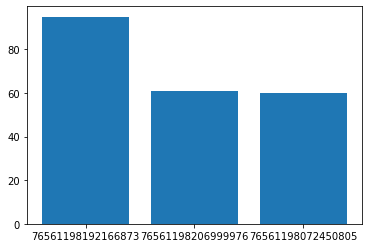

In [12]:
authorMOD_sortedHead = authorMOD.sort_values(["Numero Modifiche"], ascending=False).head(3)
authorMOD_sortedHead
df.plt.bar(list(map(str,authorMOD_sortedHead.index)), authorMOD_sortedHead["Numero Modifiche"]);

In [13]:
authorMOD_sortedHead

,Numero Modifiche
author.steamid,
76561198192166873,95
76561198206999976,61
76561198072450805,60


Top 3 utenti con più recensioni aggiornate (Questa lista prende in considerazione il numero totale di recensioni e il numero di recensioni aggiornate)

In [14]:
authorNOMOD = author_steamId_AND_timedelta.loc[author_steamId_AND_timedelta["Numero Modifiche"] == "0", ["author.steamid", "Numero Modifiche"]]
authorNOMOD = authorNOMOD.rename({"Numero Modifiche": "Numero non modifiche"}, axis=1)
authorNOMOD = authorNOMOD.groupby(["author.steamid"]).count()
authorNOMOD

,Numero non modifiche
author.steamid,
76561197960265730,1
76561197960265745,2
76561197960265747,1
76561197960265778,2
76561197960265781,4
...,...
76561199133107792,1
76561199133134170,1
76561199133159367,1


In [15]:
AuthorTOT = author_steamId_AND_timedelta.groupby(["author.steamid"]).count()
AuthorTOT = AuthorTOT.rename({"Numero Modifiche": "TOT"}, axis=1)
AuthorTOT["Numero modifiche"] = authorMOD
AuthorTOT["Numero non modifiche"] = authorNOMOD
AuthorTOT.head(10)

,TOT,Numero modifiche,Numero non modifiche
author.steamid,,,
76561197960265730,1,NaN,1.0
76561197960265745,2,NaN,2.0
76561197960265747,1,NaN,1.0
76561197960265778,2,NaN,2.0
76561197960265781,4,NaN,4.0
76561197960265806,1,NaN,1.0
76561197960265817,1,NaN,1.0
76561197960265822,3,1.0,2.0
76561197960265836,1,NaN,1.0


In [17]:
perc = AuthorTOT.swifter.apply(lambda row: row["Numero modifiche"]*100/row["TOT"],axis=1)
AuthorTOT["Percentuale di modifica"] = perc
AuthorTOT

Dask Apply:   0%|          | 0/40 [00:00<?, ?it/s]

,TOT,Numero modifiche,Numero non modifiche,Percentuale di modifica
author.steamid,,,,
76561197960265730,1,NaN,1.0,NaN
76561197960265745,2,NaN,2.0,NaN
76561197960265747,1,NaN,1.0,NaN
76561197960265778,2,NaN,2.0,NaN
76561197960265781,4,NaN,4.0,NaN
...,...,...,...,...
76561199133107792,1,NaN,1.0,NaN
76561199133134170,1,NaN,1.0,NaN
76561199133159367,1,NaN,1.0,NaN


In [19]:
x =AuthorTOT.sort_values(["Percentuale di modifica", "TOT"], ascending=False).head(3)
x

,TOT,Numero modifiche,Numero non modifiche,Percentuale di modifica
author.steamid,,,,
76561198072450805,60,60.0,NaN,100.0
76561197972642306,43,43.0,NaN,100.0
76561198006784126,35,35.0,NaN,100.0


# RQ2 test

In [5]:
df.steam[["app_name", "recommended", "received_for_free", "steam_purchase"]].groupby(["app_name"]).sum().sort_values(["recommended"], ascending=False)

,recommended,received_for_free,steam_purchase
app_name,,,
PLAYERUNKNOWN'S BATTLEGROUNDS,886417,61443,1372721
Grand Theft Auto V,831311,38624,905288
Tom Clancy's Rainbow Six Siege,742397,36300,702505
Terraria,658741,20154,527762
Garry's Mod,632558,24765,551250
...,...,...,...
Out of the Park Baseball 19,594,11,650
Shadow Complex Remastered,587,21,280
Identity,439,40,513


In [9]:
df.steam[["app_name", "weighted_vote_score"]].groupby(["app_name"]).max().sort_values(["weighted_vote_score"], ascending=False)

,weighted_vote_score
app_name,
Stardew Valley,0.995987
Divinity: Original Sin 2,0.995245
Subnautica,0.994453
Mirror,0.994038
Wallpaper Engine,0.993540
...,...
Down To One,0.865875
Out of the Park Baseball 19,0.848728
Slipstream,0.815560


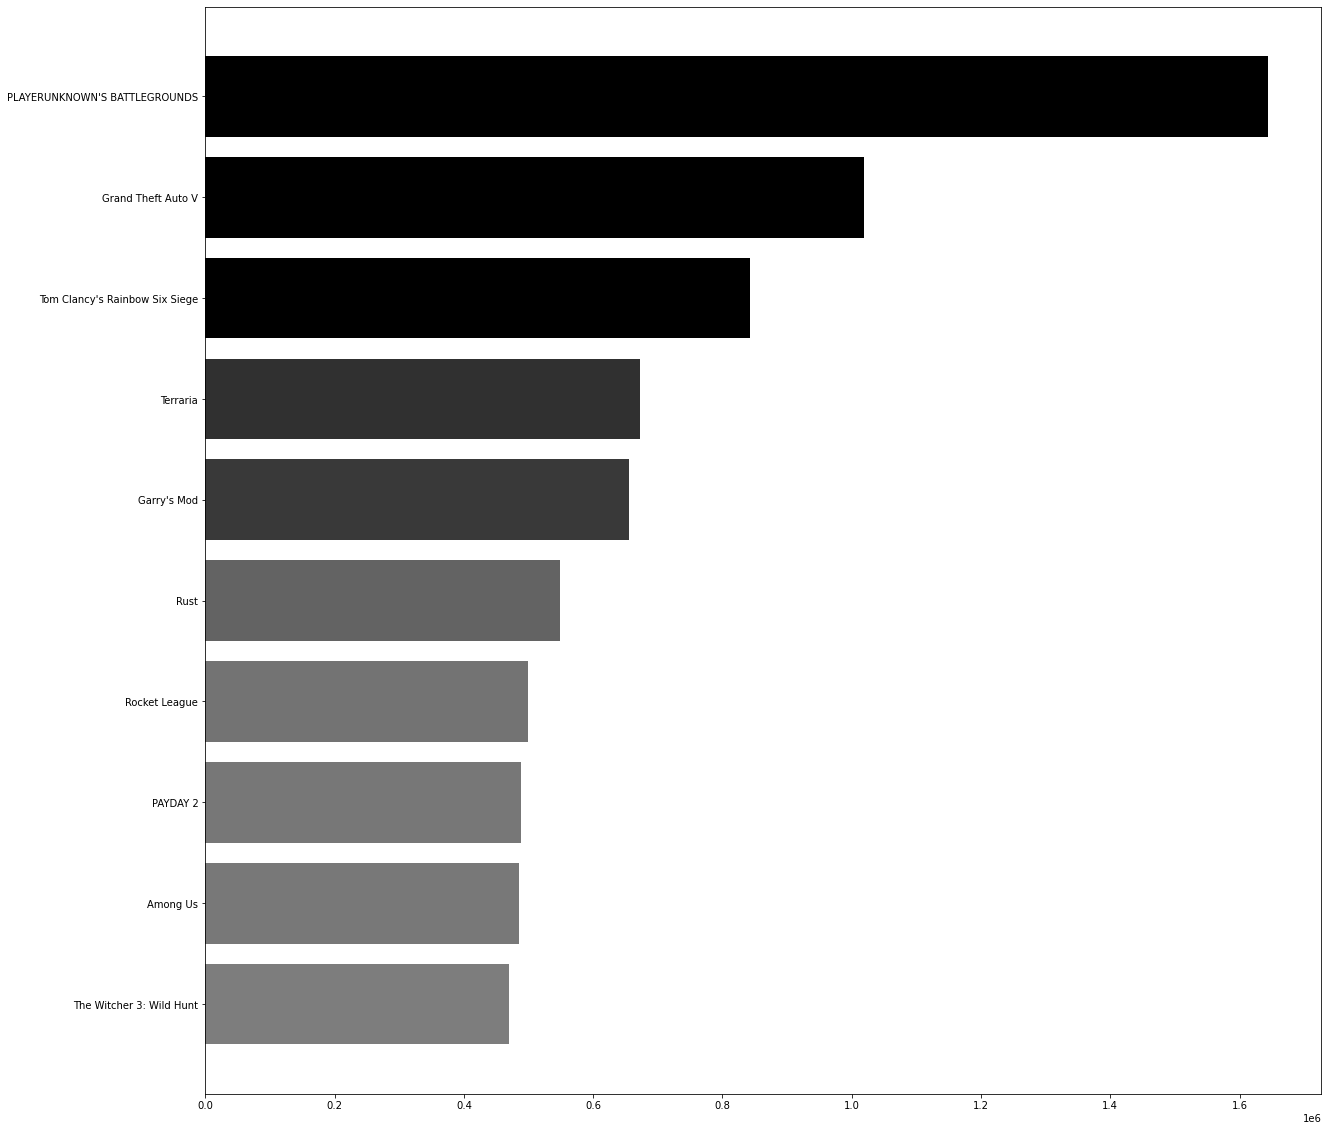

In [146]:
n = 10
g = df.steam[["app_name", "review_id"]].groupby(["app_name"]).count().sort_values(["review_id"], ascending=True).tail(n)

height = g["review_id"].array
val = g.index


my_cmap = df.plt.get_cmap('Greys')
my_norm = df.plt.Normalize(vmin=0,vmax=800000)


df.plt.figure(figsize=(n*2,n*2))
df.plt.barh(val, height, color=my_cmap(my_norm(height)));

review_id    94041
dtype: int64

matplotlib.colors.ListedColormap